In [4]:
import nltk
import spacy

In [ ]:
spacy.load()

In [16]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
from nltk.stem.snowball import SnowballStemmer

In [11]:
import pandas as pd
pd.set_option('max_colwidth', 80)

from re import sub, split, match
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
import seaborn as sns

stemmer = SnowballStemmer(language='english')
nlp = spacy.load('en', disable=['parser', 'ner'])

def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d


def clean_twitter(s):
    """ Cleans Twitter specific issues
    
    Should probably clean out mentions, URLs, and RT's.
    """

    # TODO: Use regular expressions to remove unwanted
    # text and clean up our tweets to be more usable!

    # BONUS: Try using the library "spacy" to 
    # do further processing, such as lemmatizing
    # or replacing Named Entities with constants (i.e. "[NAMED]")
    # or adding the part of speech or dependency code to the word 
    
    #take out RT
    regex_RT = r'RT '
    s_wo_RT = re.sub(regex_RT,'',s)

    #take out URLS
    regex_URL = r'https\S+'
    s_wo_RT_URL = re.subn(regex_URL,'',s_wo_RT)[0]
    
    #take out mentions
    try: 
        regex_author = r'@\w+(=)?:'
        author = re.match(regex_author,s_wo_RT_URL).group()
    except:
        author = ''
        
    regex_mention = r'@\w+(:)?'
    s_no_person = re.sub(regex_mention,'',s_wo_RT_URL)
    
    #stemmer
    
    s_stemmer = stemmer.stem(s_no_person)
    
    #lemmatizing
    
    doc = nlp(s_stemmer)
    
    s_lemma = ' '.join([token.lemma_ for token in doc])
    
    #put author back
    s_author_message = author + s_lemma
    
    #put to left
    regex_initial_space = r'\s+'
    s_final = re.sub(regex_initial_space,'',s_author_message,1)
        

    return s_final

In [12]:
import re

In [13]:
X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label

In [14]:
X.map(clean_twitter)

0       @LilMissRightie:here be cnn on sharia law . -PRON- can be stone or have -PRO...
1       @NetworksManager:look obama clinton crony illegally arm & amp ; train muslim...
2       @GrrrGraphics:# throwbackthursday # bengarrison # cartoon from 2013 # obama ...
3       @PeterTownsend7:say ' islam be peace ' , or else !   # trump # maga # isis #...
4                                @ToddDracula:all aboard the trump train ! # choochoo 🚂
5       @JudicialWatch:flashback & gt;&gt ; judicial watch release huma abedin depos...
6       @LouDobbs:follow fbi presser ,   say “ the system be rig ! "   & amp ;   wei...
7                         @Ricky_Vaughn99:trump : " -PRON- be run against a rig press "
8       @mitchellvii:literally 98 % of hillary supporter i see online be astroturfe ...
9                                                               @ClarkW2016:islam . ...
10      @MightyBusterBro:. \n psycho - mother \n hillary at -PRON- most evil . \n\n ...
11      @ThomasPKennedy3:the unt

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

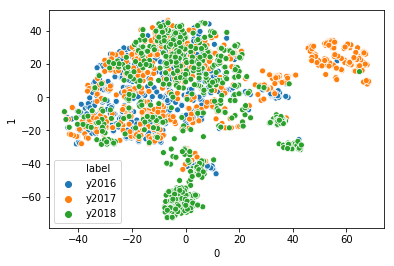

In [16]:
# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

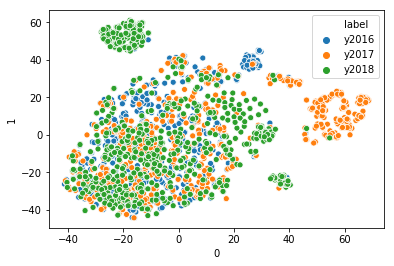

In [17]:
# Now let's see what our cleaning has done

vectorizer = CountVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

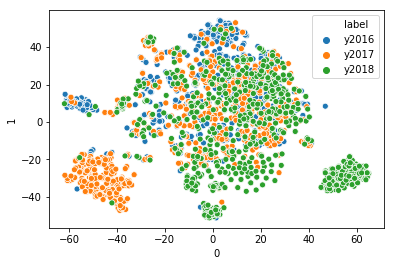

In [23]:
# Now try with TF-IDF vectorizer, and add implicit stopwords!
# Can you get things to separate in the space in a better way? 

vectorizer = TfidfVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

/home/gsitges/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['PRON', 'abov', 'ani', 'becaus', 'befor', 'benot', 'couldnot', 'doe', 'donot', 'dure', 'havenot', 'mightnot', 'mustnot', 'neenot', 'onc', 'onli', 'ourselv', 'shallnot', 'shouldnot', 'thatwill', 'themselv', 'veri', 'whi', 'willnot', 'win', 'would', 'wouldnot', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


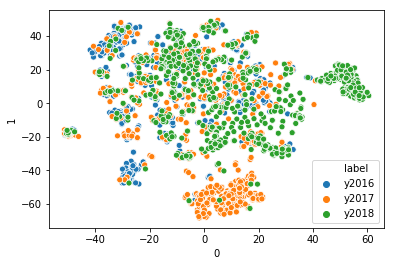

In [18]:
#adding some stop words more
vectorizer = TfidfVectorizer(preprocessor = clean_twitter, stop_words = nltk.corpus.stopwords.words('english'))
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

/home/gsitges/anaconda3/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['PRON', 'abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'couldnot', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'havenot', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'make', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'plea', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsisten

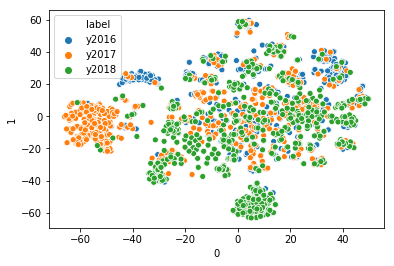

In [24]:
#adding some stop words more
vectorizer = TfidfVectorizer(preprocessor = clean_twitter, stop_words = 'english')
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

In [28]:
my_stop_words = ['PRON', 'abov', 'ani', 'becaus', 'befor', 'benot', 'couldnot', 'doe', 'donot', 'dure', 'havenot', 'mightnot', 'mustnot', 'neenot', 'onc', 'onli', 'ourselv', 'shallnot', 'shouldnot', 'thatwill', 'themselv', 'veri', 'whi', 'willnot', 'win', 'would', 'wouldnot', 'yourselv','PRON', 'abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'couldnot', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'havenot', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'make', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'plea', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv','anywh', 'el', 'elsewh', 'everywh', 'ind', 'otherwi', 'pron', 'somewh', 'thatwil']

In [29]:
final_stop_words = nltk.corpus.stopwords.words('english') + my_stop_words

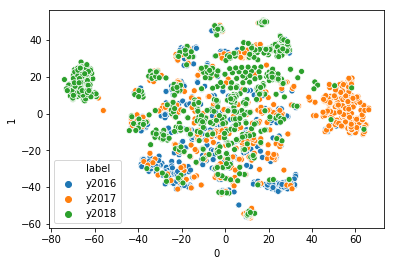

In [30]:
#adding some stop words more
vectorizer = TfidfVectorizer(preprocessor = clean_twitter, stop_words = final_stop_words)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)